<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-single-profile" data-toc-modified-id="Plot-single-profile-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot single profile</a></span></li><li><span><a href="#Z-stack-images" data-toc-modified-id="Z-stack-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Z-stack images</a></span><ul class="toc-item"><li><span><a href="#(A)-Plot-GFP-profiles-vs-x" data-toc-modified-id="(A)-Plot-GFP-profiles-vs-x-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>(A) Plot GFP profiles vs x</a></span><ul class="toc-item"><li><span><a href="#(1)-Entire-z-stacks-together" data-toc-modified-id="(1)-Entire-z-stacks-together-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>(1) Entire z-stacks together</a></span></li><li><span><a href="#(2)-Individual-images-(fix-z)" data-toc-modified-id="(2)-Individual-images-(fix-z)-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>(2) Individual images (fix z)</a></span></li></ul></li><li><span><a href="#(B)-Plot-GFP-profiles-vs-z" data-toc-modified-id="(B)-Plot-GFP-profiles-vs-z-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>(B) Plot GFP profiles vs z</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Image settings
size = np.array([593.74, 758.12, 21.9]); # total size of image in microns
Lx = 593.74
Ly = 758.12
Lz = 21.9;
pix_per_micron = 9.6355; # number of pixels per micron

## Plot single profile
From maximum intensity projection

In [32]:
path = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Adrian_270120/Data_profiles/";
fname_in = "Profile_OsxGFP_max_projection.csv";
#fname_in = "/Users/dang/Documents/Tabler lab/Data_Adrian_210220/"
#fname_in = "/Users/dang/Documents/Tabler lab/Data_Adrian_270120/Profiles/Profile_channel_1_zstack_80.csv";
mydata = pd.read_csv(path+fname_in, header = None)
yvals = np.asarray(mydata[1][1:]);
yvals[yvals == ''] = 0.0
yvals = yvals.astype(np.float) # convert into np array with floats
xvals = np.linspace(0, 593.640, len(yvals))

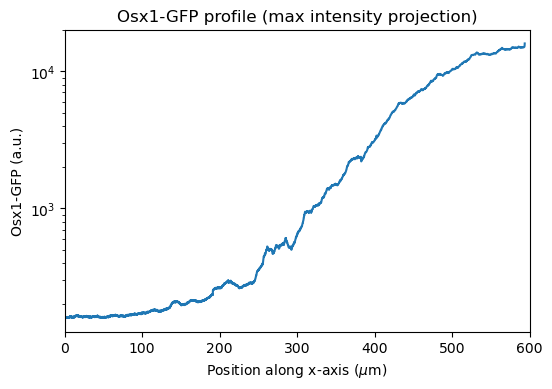

In [33]:
# Plot profile
plt.figure(figsize=(6, 4), dpi=100);
#a = plt.plot(xvals[0::2], yvals[0::2], '-')
a = plt.plot(xvals, yvals, '-')
plt.xlim(0, 600)
#plt.ylim(0, 16000)
plt.yscale('log')
#plt.yticks(np.arange(0, 16001, step=1000))
plt.xlabel('Position along x-axis ($\mu$m)')
plt.ylabel('Osx1-GFP (a.u.)')
plt.title('Osx1-GFP profile (max intensity projection)')

# save figure
fname_out = "270120_Osx1GFP_x-profile_maxIntensity_log.pdf";
#plt.savefig(fname_out)

# plt.show(a)

Reminder: x-axis perpendicular to front, GFP averaged over y (parallel to front) 

<b>Observation</b>: Tail of wavefront does not appear to be exponential  (a characteristic of Fisher waves).

## Z-stack images

### (A) Plot GFP profiles vs x

#### (1) Entire z-stacks together

In [5]:
path = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Adrian_270120/Data_profiles/";
channel = 1;

In [6]:
nslices = 73;
ndatapoints_raw = 1423; 
#nslices = zrange[1] - zrange[0]
#ndatapoints = img[0].shape[0] + xrange[1] - xrange[0] 

vals_stack = np.zeros((nslices, ndatapoints_raw));
for stack in range(1, nslices+1):
    fname = "{}/Profile_channel_{}_zstack_{}.csv".format(path, channel, stack);
    # print(fname);
    # read csv data
    mydata = pd.read_csv(fname, header = None)
    vals = np.asarray(mydata[1][1:]);
    vals[vals == ''] = 0.0
    vals = vals.astype(np.float) # convert into np array with floats
    vals_stack[stack-1, 0:len(vals)] = vals;
    #print(len(vals))
    

In [26]:
# Trim data
xrange = [0, ndatapoints-100]
zrange = [0, 73]
ndatapoints = xrange[1]-xrange[0]
intensity_trimmed = vals_stack[zrange[0]:zrange[1], xrange[0]:xrange[1] ];

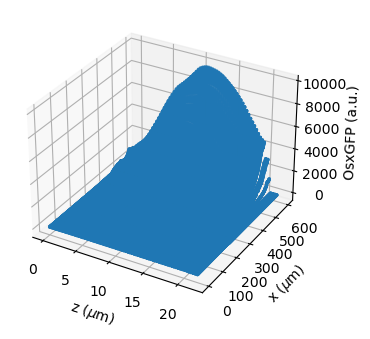

In [27]:
z_vals = np.linspace(zrange[0], zrange[1], nslices)*Lz/nslices
slice_vals = np.tile(z_vals, (ndatapoints, 1)).T; # values of each slice
x_vals = np.tile( np.linspace(0, Lx, ndatapoints), (nslices, 1)) ; # values along perpendicular axis

# slice_vals = np.tile(np.arange(1,nslices+1), (ndatapoints, 1)).T; # values of each slice
# x_vals = np.tile( np.linspace(0, 593.640, ndatapoints), (nslices, 1)) ; # values along perpendicular axis

# Check results
#print(slice_vals[0:10, 0:10])
#print(x_vals[0:10, 0:10])
#print(vals_stack[0:10, 0:10])

# Plot results
fig = plt.figure(figsize=(6, 4), dpi=100)
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
ax.scatter(slice_vals, x_vals, intensity_trimmed, s=2)
ax.set_xlabel('z ($\mu$m)')
ax.set_ylabel('x ($\mu$m)')
ax.set_zlabel('OsxGFP (a.u.)');

# save figure
folder_out = "/Users/dang/Documents/Projects/Tabler_skull/Figures/Fixed_tissue_compare_WT_BAPN/"
fname_out = "270120_z_stack_x-profile_Osx1GFP_maxIntensity_trimmed.png";
plt.savefig(folder_out+fname_out)

#plt.savefig(fname_out)

plt.show()

<b>Note</b>: GFP profiles show clear peak in the middle of the z-stack. This is probably due to the curved profile in the z-direction. Nevertheless, could there also be either more differentiation in the middle or higher cell densities?

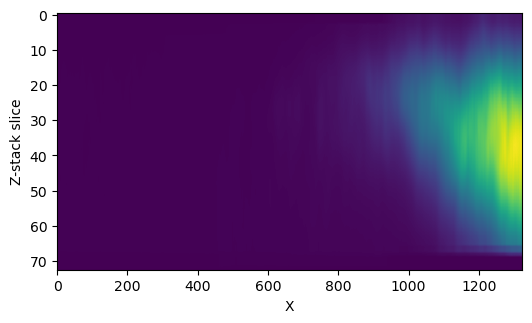

In [30]:
fig, ax = plt.subplots(dpi=100)

# x_vals, slice_vals, 
ax.imshow(intensity_trimmed, aspect=10)
ax.set_ylabel('Z-stack slice')
ax.set_xlabel('X')
plt.show()

#### (2) Individual images (fix z)

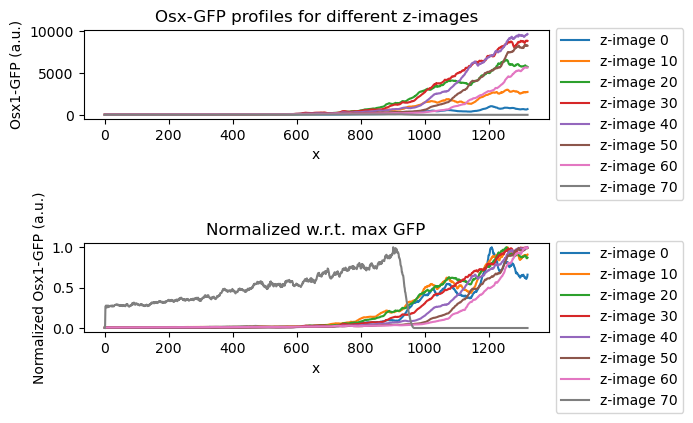

In [28]:
fig_x_profiles = plt.figure(dpi=100);
x_range = np.arange(0, nslices, 10);

plt.subplot(3, 1, 1)
plt.title('Osx-GFP profiles for different z-images')
for i in x_range:
    plt.plot(intensity_trimmed[i, :], label='z-image '+str(i))
plt.xlabel('x')
plt.ylabel('Osx1-GFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))
    
plt.subplot(3, 1, 3)
plt.title('Normalized w.r.t. max GFP')
for i in x_range:
    plt.plot(intensity_trimmed[i, :]/max(intensity_trimmed[i, :]), label='z-image '+str(i))

plt.xlabel('x')
plt.ylabel('Normalized Osx1-GFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))

<b>Observation</b>: Front profile and location vary across z. From the second plot, it is visible that there is some variation in profiles even after normalizing by the maximum GFP intensity of each profile.

### (B) Plot GFP profiles vs z

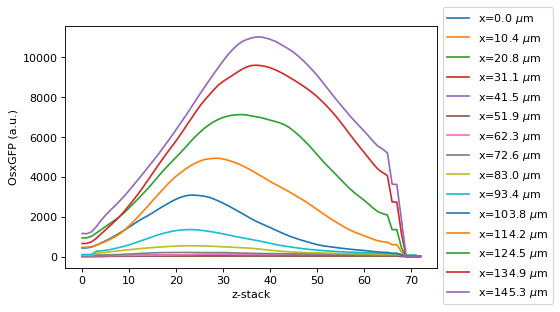

In [47]:
fig_z_profiles = plt.figure(dpi=80);
x_range = np.arange(0, ndatapoints, 100);
for i in x_range:
    plt.plot(vals_stack[:, i], label='x='+str(round(i/pix_per_micron, 1))+' $\mu$m')
plt.xlabel('z-stack')
plt.ylabel('OsxGFP (a.u.)')
plt.legend(bbox_to_anchor=(1, 1.1))

<b>Note</b>:
Maximum GFP intensity across all z-stack images shifts with x-positions. This is also an effect of the shifting bone position in the z-direction.